In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1645792390_cep1_dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.tail(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()   # there is no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df[df.duplicated()]   # row number 164 is a duplicate row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)    # removing the duplicate row
df.shape

(302, 14)

<Axes: >

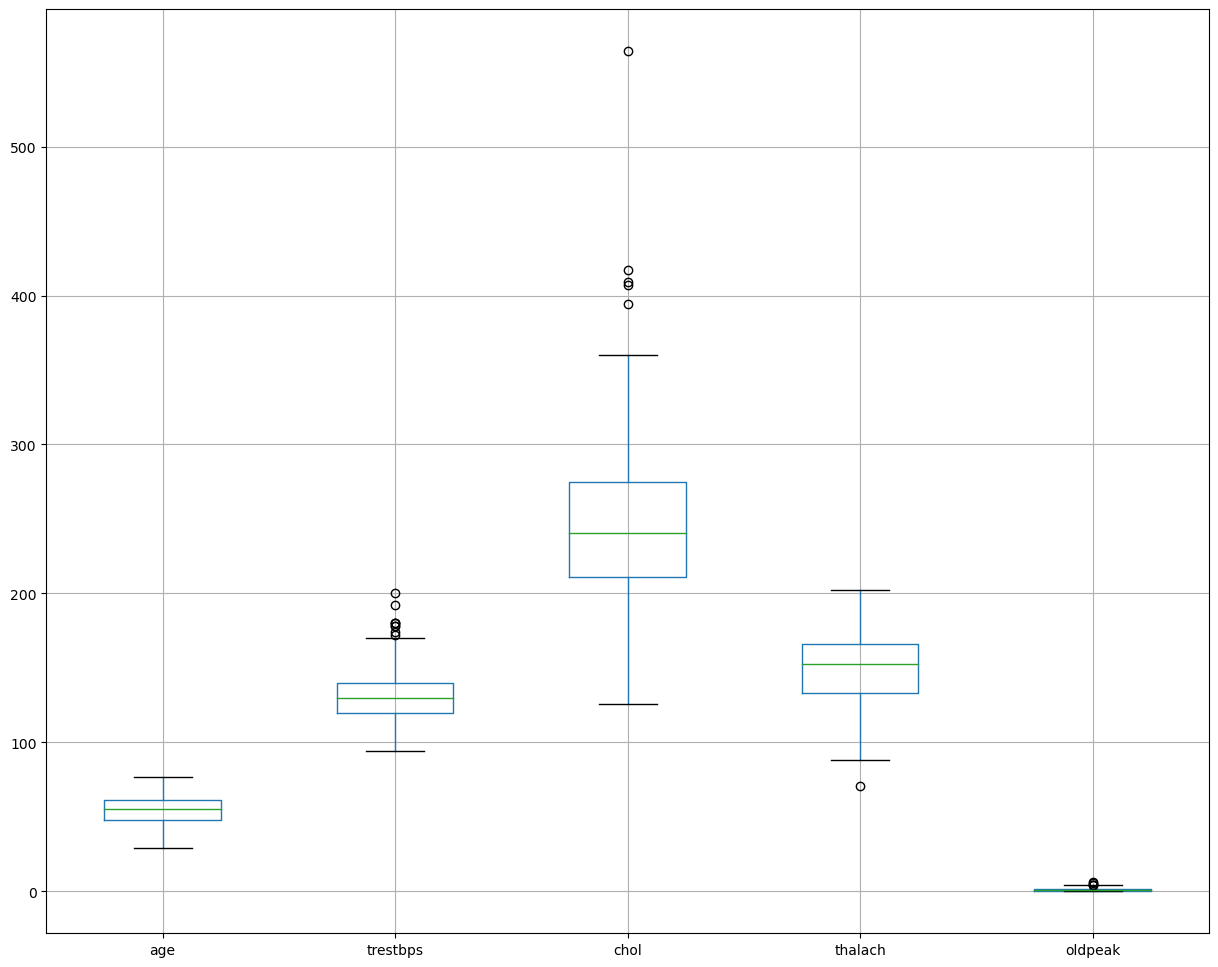

In [11]:
# checking for outliers
plt.figure(figsize=(15,12))
df.boxplot(column=['age','trestbps','chol','thalach','oldpeak']) 

In [12]:
# there are outliers in the numerical columns except "age"

In [13]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ['age','trestbps','chol','thalach','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trestbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalach attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [14]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['trestbps','chol','thalach','oldpeak']:
    df[i]=handle_outliers(df[i])

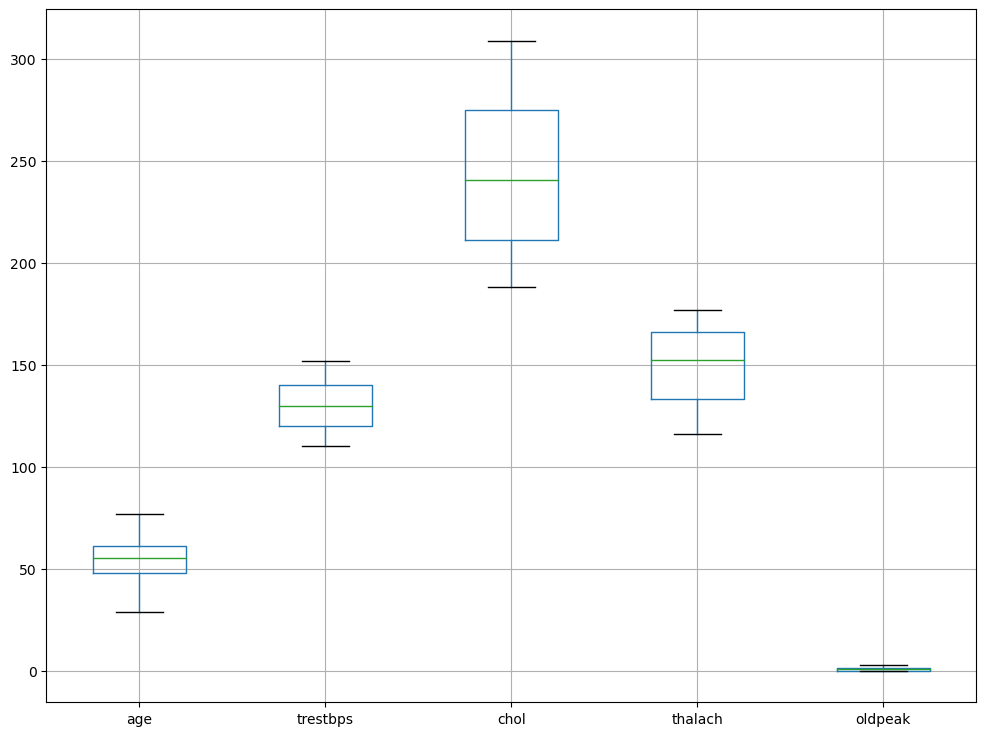

In [15]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
df.boxplot(column=['age','trestbps','chol','thalach','oldpeak']);

In [16]:
# now there are no outliers

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,130.523179,13.620063,110.0,120.00,130.0,140.00,152.0
chol,302.0,244.696358,39.237586,188.4,211.00,240.5,274.75,308.9
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.992715,19.608496,116.0,133.25,152.5,166.00,176.8
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,0.966556,0.976726,0.0,0.00,0.8,1.60,2.8


In [19]:
mean_value = df.mean()
median_value = df.median()

std_deviation = df.std()
interquartile_range = df.quantile(0.75) - df.quantile(0.25)

print("Mean:\n", mean_value)


Mean:
 age          54.420530
sex           0.682119
cp            0.963576
trestbps    130.523179
chol        244.696358
fbs           0.149007
restecg       0.526490
thalach     149.992715
exang         0.327815
oldpeak       0.966556
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64


In [20]:
print("\nMedian:\n", median_value)



Median:
 age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64


In [21]:
print("\nStandard Deviation:\n", std_deviation)



Standard Deviation:
 age          9.047970
sex          0.466426
cp           1.032044
trestbps    13.620063
chol        39.237586
fbs          0.356686
restecg      0.526027
thalach     19.608496
exang        0.470196
oldpeak      0.976726
slope        0.616274
ca           1.006748
thal         0.613026
target       0.498970
dtype: float64


In [22]:
print("\nInterquartile Range:\n", interquartile_range)


Interquartile Range:
 age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


In [55]:
## Categorical features

df["sex"].value_counts()



1    206
0     96
Name: sex, dtype: int64

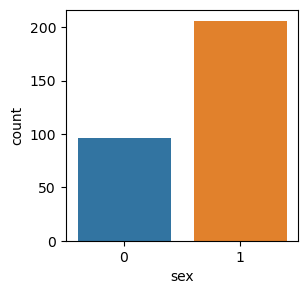

In [54]:
plt.figure(figsize=(3,3))
sns.countplot(x = "sex",data = df)
plt.show()

In [26]:
df["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

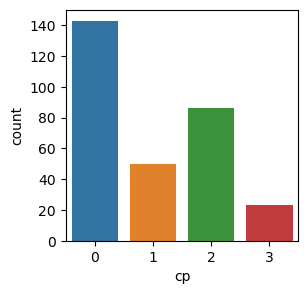

In [53]:
plt.figure(figsize=(3,3))
sns.countplot(x = "cp",data = df)
plt.show()

In [27]:
df["fbs"].value_counts()


0    257
1     45
Name: fbs, dtype: int64

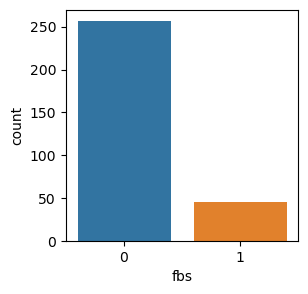

In [44]:
plt.figure(figsize=(3,3))
sns.countplot(x = "fbs",data = df)
plt.show()

In [28]:
df["restecg"].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

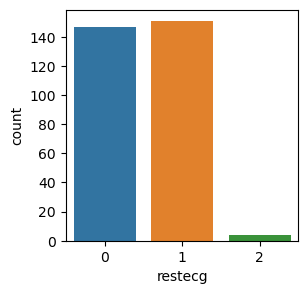

In [52]:
plt.figure(figsize=(3,3))
sns.countplot(x = "restecg",data = df)
plt.show()

In [29]:
df["exang"].value_counts()

0    203
1     99
Name: exang, dtype: int64

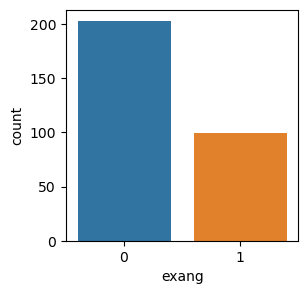

In [46]:
plt.figure(figsize=(3,3))
sns.countplot(x = "exang",data = df)
plt.show()

In [30]:
df["slope"].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

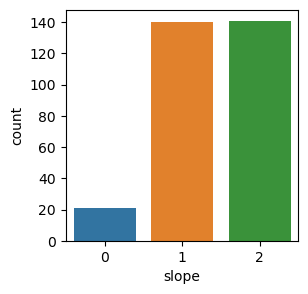

In [47]:
plt.figure(figsize=(3,3))
sns.countplot(x = "slope",data = df)
plt.show()

In [31]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

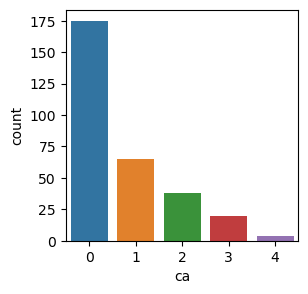

In [48]:
plt.figure(figsize=(3,3))
sns.countplot(x = "ca",data = df)
plt.show()

In [32]:
df["thal"].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

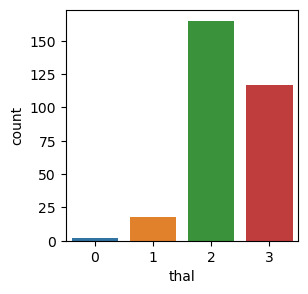

In [49]:
plt.figure(figsize=(3,3))
sns.countplot(x = "thal",data = df)
plt.show()

In [33]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

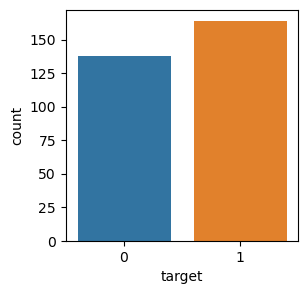

In [50]:
plt.figure(figsize=(3,3))
sns.countplot(x = "target",data = df)
plt.show()

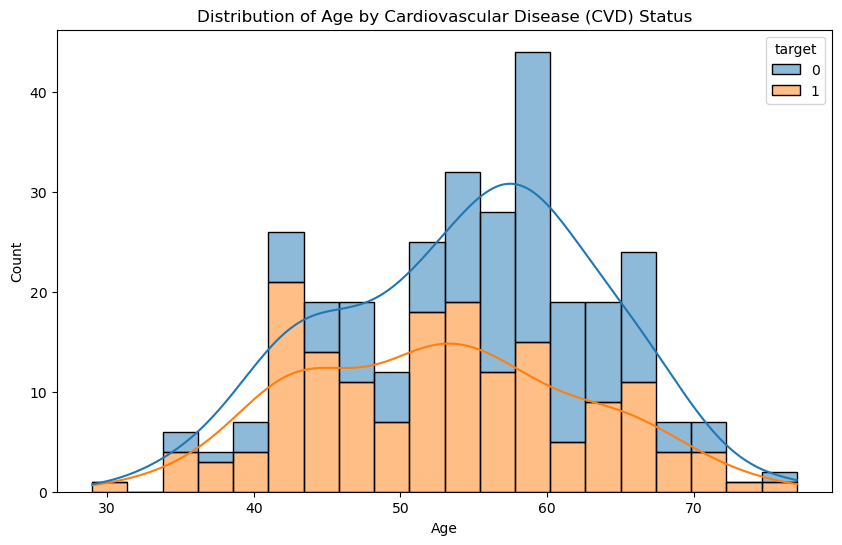

In [66]:
# Example: Histogram of Age, separated by CVD status
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='target', bins=20, kde=True, multiple='stack')
plt.title('Distribution of Age by Cardiovascular Disease (CVD) Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

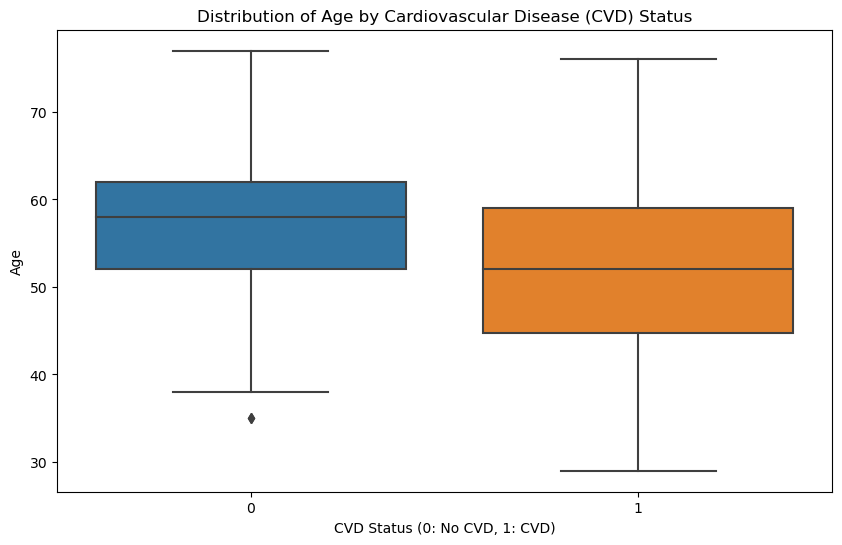

In [65]:
# Example: Boxplot of Age vs. Target (CVD)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribution of Age by Cardiovascular Disease (CVD) Status')
plt.xlabel('CVD Status (0: No CVD, 1: CVD)')
plt.ylabel('Age')
plt.show()